In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''for dirname, _, filenames in os.walk('/content/drive/My Drive/Project2020'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"for dirname, _, filenames in os.walk('/content/drive/My Drive/Project2020'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil
import glob
import cv2
#shutil.rmtree('/kaggle/working/augmented')

In [ ]:
#os.mkdir('/content/drive/My Drive/Project2020/working/augmented')

In [ ]:
#os.mkdir('/content/drive/My Drive/Project2020/working/augmented/benign')
#os.mkdir('/content/drive/My Drive/Project2020/working/augmented/malignant')

In [ ]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles



In [ ]:
def processing2(img_path):
    img = cv2.imread(img_path)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224,224))
    image = cv2.medianBlur(image, 5)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    image[:, :, 2] = cv2.equalizeHist(image[:, :, 2])
    image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
    cv2.imwrite(img_path,image)

In [ ]:
files_benign=getListOfFiles('/content/drive/My Drive/Project2020/BreaKHis_v1/histology_slides/breast/benign')
for f in files_benign:
    if f.endswith('.png'):
        shutil.copy(f,'/content/drive/My Drive/Project2020/working/augmented/benign')

In [ ]:
files_malignant=getListOfFiles('/content/drive/My Drive/Project2020/BreaKHis_v1/histology_slides/breast/malignant')
for f in files_malignant:
    if f.endswith('.png'):
        shutil.copy(f,'/content/drive/My Drive/Project2020/working/augmented/malignant')

In [ ]:
onlyfiles = next(os.walk('/content/drive/My Drive/Project2020/working/augmented/benign'))[2] 
benign=len(onlyfiles)
onlyfiles = next(os.walk('/content/drive/My Drive/Project2020/working/augmented/malignant'))[2] 
malignant=len(onlyfiles)
print('Total no of files in both benign and malignant is :',malignant+benign)

Total no of files in both benign and malignant is : 7917


In [ ]:
benign=getListOfFiles('/content/drive/My Drive/Project2020/working/augmented/benign')
x=[]
y=[]
for f in benign:
    img=cv2.imread(f)
    imgrs = cv2.resize(img, (224,224))
    print(imgrs.shape)
    #rs=imgrs.reshape(224 * 224 * 3)
    x.append(imgrs)
    y.append(0)


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 

In [ ]:
x[0].shape

(224, 224, 3)

In [ ]:
i=1
malignant=getListOfFiles('/content/drive/My Drive/Project2020/working/augmented/malignant')
for f in malignant:
  if(i<=2488):
    i=i+1
    img=cv2.imread(f)
    print(img.shape)
    imgrs = cv2.resize(img, (224,224))
    #rs=imgrs.reshape(224 * 224 * 3)
    x.append(imgrs)
    y.append(1)

(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 700, 3)
(460, 

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

rus = RandomUnderSampler(random_state=42)
x_res, y_res = rus.fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


NameError: ignored

In [ ]:
rus = RandomUnderSampler(random_state=42, stratify=x)
x_res, y_res = rus.fit_resample(x, y)

In [ ]:
x_res1=[]#
for i in range(len(x_res)):
  x_res1.append(x_res[i].reshape((224, 224,3)))


In [ ]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

In [ ]:
X_train=x_res1
y_train= y_res

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test, y_train1, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
y[0]

0

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import warnings

In [ ]:
model = Sequential()

model.add(Conv2D(32, (5, 5), padding='same', input_shape=(224, 224, 3), activation="swish"))
model.add(Conv2D(32, (5, 5), activation="swish"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', activation="swish"))
model.add(Conv2D(64, (3, 3), activation="swish"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', activation="swish"))
model.add(Conv2D(128, (3, 3), activation="swish"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same', activation="swish"))
model.add(Conv2D(256, (3, 3), activation="swish"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(1024, activation="swish"))
model.add(BatchNormalization())
model.add(Dense(2, activation="softmax"))

EPOCHS = 70
INIT_LR = 1e-3
BS = 64
IMAGE_DIMS = (224,224)

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.AUC(name='auc')
]


In [ ]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

#32,64,128,256,d 2048,102
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
#opt = Adam(lr=0.001)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy',METRICS])
# train the network
early_stopping = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=2, min_lr=0.001)

In [ ]:
checkpointer = ModelCheckpoint('/content/drive/My Drive/Project2020/working/results'+get_model_name("swish_my_model"), 
							monitor='val_accuracy', verbose=1, 
							save_best_only=True, mode='m4/1AfDhmrj7JgD2OxLL3WNit6xelkbJ3xrSzTQ4MT_7IiiJRgANLGcBxVZedgUax')
callbacks_list = [checkpointer,early_stopping]
#class_weights={0:(1/1121),1:(1/1832)}
#len(valid_batches),
print("[INFO] training network...")

[INFO] training network...


In [ ]:
'''H = model.fit(x=ig.flow(X_train1,y_train1, batch_size=64),
    steps_per_epoch=20,             
    validation_data=ig.flow(X_test,y_test, batch_size=64),
    validation_steps=10,
    epochs=20, callbacks=callbacks_list,batch_size=64)'''

'H = model.fit(x=ig.flow(X_train1,y_train1, batch_size=64),\n    steps_per_epoch=20,             \n    validation_data=ig.flow(X_test,y_test, batch_size=64),\n    validation_steps=10,\n    epochs=20, callbacks=callbacks_list,batch_size=64)'

In [ ]:
benign

2488

In [ ]:
benign=getListOfFiles('/content/drive/My Drive/Project2020/working/augmented/benign')
print(benign)
for f in benign:
    processing2(f)

NameError: ignored

In [ ]:
malignant=getListOfFiles('/content/drive/My Drive/Project2020/working/augmented/malignant')
for f in malignant:
    processing2(f)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
ig=ImageDataGenerator(validation_split=0.2,
                      featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=20,
    width_shift_range=0.5,
    height_shift_range=0.5,
    brightness_range=None,
    shear_range=0.5,
    zoom_range=0.0,
    channel_shift_range=0.3,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    dtype=None)

In [ ]:
path='/content/drive/My Drive/Project2020/working/augmented'

In [ ]:
train_batches = ig.flow_from_directory(directory=path,
                                       target_size=(224,224),
                                       classes=['benign', 'malignant'],
                                       batch_size=64,
                                       subset='training')
valid_batches = ig.flow_from_directory(directory=path,
                                       target_size=(224,224),
                                       classes=['benign', 'malignant'],
                                       batch_size=64,
                                       subset='validation')

Found 6335 images belonging to 2 classes.
Found 1582 images belonging to 2 classes.


In [ ]:
type(train_batches)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [ ]:
imgs, labels = next(train_batches)

In [ ]:
type(labels),type(imgs)

(numpy.ndarray, numpy.ndarray)

In [ ]:
imgs.shape,labels.shape

((64, 224, 224, 3), (64, 2))

In [ ]:

model = Sequential()

model.add(Conv2D(32, (5, 5), padding='same', input_shape=(224, 224, 3), activation="swish"))
model.add(Conv2D(32, (5, 5), activation="swish"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', activation="swish"))
model.add(Conv2D(64, (3, 3), activation="swish"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', activation="swish"))
model.add(Conv2D(128, (3, 3), activation="swish"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same', activation="swish"))
model.add(Conv2D(256, (3, 3), activation="swish"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(1024, activation="swish"))
model.add(BatchNormalization())
model.add(Dense(2, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 110, 110, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0

In [ ]:
EPOCHS = 70
INIT_LR = 1e-3
BS = 64
IMAGE_DIMS = (224,224)

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.AUC(name='auc')
]

In [ ]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

In [ ]:
#32,64,128,256,d 2048,102
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
#opt = Adam(lr=0.001)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy',METRICS])
# train the network
early_stopping = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=2, min_lr=0.001)
#EarlyStopping(patience=10)
#checkpointer = ModelCheckpoint('best1.h5', verbose=1, save_best_only=True)
checkpointer = ModelCheckpoint('/content/drive/My Drive/Project2020/working/results'+get_model_name("swish_my_model"), 
							monitor='val_accuracy', verbose=1, 
							save_best_only=True, mode='m4/1AfDhmrj7JgD2OxLL3WNit6xelkbJ3xrSzTQ4MT_7IiiJRgANLGcBxVZedgUax')
callbacks_list = [checkpointer,early_stopping]
#class_weights={0:(1/1121),1:(1/1832)}
#len(valid_batches),
print("[INFO] training network...")
#len(train_batches),
H = model.fit(x=train_batches,
    steps_per_epoch=20,             
    validation_data=valid_batches,
    validation_steps=10,
    epochs=20, callbacks=callbacks_list,batch_size=64)

[INFO] training network...
Epoch 1/20
20/20 [==============================] - ETA: 0s - loss: 1.5037 - accuracy: 0.5883 - tp: 753.0000 - fp: 527.0000 - tn: 753.0000 - fn: 527.0000 - auc: 0.6027 
Epoch 00001: val_accuracy improved from -inf to 0.68281, saving model to /content/drive/My Drive/Project2020/working/resultsmodel_swish_my_model.h5
20/20 [==============================] - 893s 45s/step - loss: 1.5037 - accuracy: 0.5883 - tp: 753.0000 - fp: 527.0000 - tn: 753.0000 - fn: 527.0000 - auc: 0.6027 - val_loss: 0.6211 - val_accuracy: 0.6828 - val_tp: 437.0000 - val_fp: 203.0000 - val_tn: 437.0000 - val_fn: 203.0000 - val_auc: 0.7082
Epoch 2/20
20/20 [==============================] - ETA: 0s - loss: 0.7818 - accuracy: 0.7021 - tp: 898.0000 - fp: 381.0000 - tn: 898.0000 - fn: 381.0000 - auc: 0.7372 
Epoch 00002: val_accuracy did not improve from 0.68281
20/20 [==============================] - 830s 41s/step - loss: 0.7818 - accuracy: 0.7021 - tp: 898.0000 - fp: 381.0000 - tn: 898.0000

In [ ]:
#class_weights = class_weight.compute_class_weight('balanced', np.unique(train_set.classes), train_set.classes)

In [ ]:
model.save('/content/drive/My Drive/Project2020/working/results/model.h5')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/Project2020/working/results/my_model_20_acc_vs_epoch.jpg')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/Project2020/working/results/my_model_20_loss_vs_epoch.jpg')
plt.show()

In [ ]:
model = keras.applications.resnet50.ResNet50()

102973440/102967424 [==============================] - 1s 0us/step


In [ ]:
import math, json, os, sys

import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing import image


from tensorflow.keras.applications import ResNet50


In [ ]:
classes=2
model1 = Sequential()
#resnet_weights_path = '/content/drive/My Drive/Datasets/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
model1.add(model)#ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
model1.add(Flatten())
#model1.add(BatchNormalization())
model1.add(Dense(2048, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(1024, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(classes, activation='softmax'))

model1.layers[0].trainable = False

In [ ]:
#32,64,128,256,d 2048,102
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
#opt = Adam(lr=0.001)
model1.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy',METRICS])
# train the network
early_stopping = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=2, min_lr=0.001)
#EarlyStopping(patience=10)
#checkpointer = ModelCheckpoint('best1.h5', verbose=1, save_best_only=True)
checkpointer = ModelCheckpoint('/content/drive/My Drive/Project2020/working/results'+get_model_name("resnet_my_model"), 
							monitor='val_accuracy', verbose=1, 
							save_best_only=True, mode='m4/1AfDhmrj7JgD2OxLL3WNit6xelkbJ3xrSzTQ4MT_7IiiJRgANLGcBxVZedgUax')
callbacks_list = [checkpointer,early_stopping]
#class_weights={0:(1/1121),1:(1/1832)}
#len(valid_batches),
print("[INFO] training network...")
#len(train_batches),
H = model1.fit(x=train_batches,
    steps_per_epoch=50,             
    validation_data=valid_batches,
    validation_steps=10,
    epochs=50, callbacks=callbacks_list,batch_size=64)

[INFO] training network...
Epoch 1/50
50/50 [==============================] - ETA: 0s - loss: 0.8085 - accuracy: 0.5911 - tp: 1891.0000 - fp: 1308.0000 - tn: 1891.0000 - fn: 1308.0000 - auc: 0.6176 
Epoch 00001: val_accuracy improved from -inf to 0.68750, saving model to /content/drive/My Drive/Project2020/working/resultsmodel_resnet_my_model.h5
50/50 [==============================] - 622s 12s/step - loss: 0.8085 - accuracy: 0.5911 - tp: 1891.0000 - fp: 1308.0000 - tn: 1891.0000 - fn: 1308.0000 - auc: 0.6176 - val_loss: 0.6529 - val_accuracy: 0.6875 - val_tp: 440.0000 - val_fp: 200.0000 - val_tn: 440.0000 - val_fn: 200.0000 - val_auc: 0.7094
Epoch 2/50
50/50 [==============================] - ETA: 0s - loss: 0.6906 - accuracy: 0.6316 - tp: 2021.0000 - fp: 1179.0000 - tn: 2021.0000 - fn: 1179.0000 - auc: 0.6769 
Epoch 00002: val_accuracy did not improve from 0.68750
50/50 [==============================] - 603s 12s/step - loss: 0.6906 - accuracy: 0.6316 - tp: 2021.0000 - fp: 1179.0000

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model1.save('/content/drive/My Drive/Project2020/working/results/res_50_epoch50_model.h5')

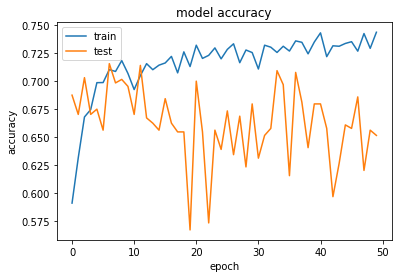

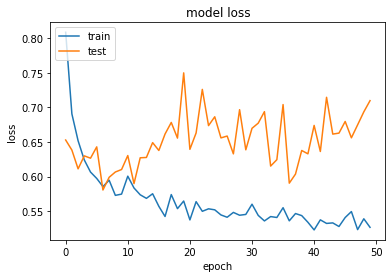

In [ ]:
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/Project2020/working/results/res50_model_epoch50_acc_vs_epoch.jpg')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/Project2020/working/results/res50_model_epoch50_loss_vs_epoch.jpg')
plt.show()

In [ ]:
from keras.utils.data_utils import Sequence
from imblearn.over_sampling import RandomOverSampler
from imblearn.keras import balanced_batch_generator

class BalancedDataGenerator(Sequence):
    """ImageDataGenerator + RandomOversampling"""
    def __init__(self, x, y, datagen,x1, batch_size=32):
        self.datagen = datagen
        self.batch_size = min(batch_size, x[0].shape[0])
        datagen.fit(x)
        self.gen, self.steps_per_epoch = balanced_batch_generator(x, y, sampler=RandomOverSampler(), batch_size=self.batch_size, keep_sparse=True)
        self._shape = (self.steps_per_epoch * batch_size, *x[0].shape[1:])
        
    def __len__(self):
        return self.steps_per_epoch

    def __getitem__(self, idx):
        x_batch, y_batch = self.gen.__next__()
        #x_batch = x_batch.reshape(-1, *self._shape[1:])
        return self.datagen.flow(x_batch, y_batch, batch_size=self.batch_size).next()

In [ ]:
files_mal = getListOfFiles('/content/drive/My Drive/Project2020/working/augmented/malignant')
x=[]
y=[]
for f in files_mal:
    if f.endswith('.png'):
        img=cv2.imread(f)
        x.append(img)
        y.append(1)

In [ ]:
len(x)

5429

In [ ]:
files_ben = getListOfFiles('/content/drive/My Drive/Project2020/working/augmented/benign')
for f in files_ben:
    if f.endswith('.png'):
        img=cv2.imread(f)
        x.append(img)
        y.append(0)

In [ ]:
balanced_gen = BalancedDataGenerator(x, y, ig,x1, batch_size= 64)

In [ ]:
steps_per_epoch = balanced_gen.steps_per_epochmodel = ... # define your model
model.compile(...) # define your compile parametersmodel.fit_generator(balanced_gen, steps_per_epoch, ...)

In [ ]:
x1=[]
for i in x:
  print(i.shape)
  x1.append(i.reshape(i.shape[0],-1))

In [ ]:
x1[0].reshape(460,-1)

array([[173, 160, 176, ..., 191, 182, 192],
       [170, 156, 174, ..., 190, 181, 191],
       [165, 149, 172, ..., 189, 183, 188],
       ...,
       [208, 219, 209, ..., 184, 164, 183],
       [206, 217, 207, ..., 187, 167, 186],
       [205, 216, 208, ..., 194, 174, 193]], dtype=uint8)

In [ ]:

model = Sequential()

model.add(Conv2D(32, (5, 5), padding='same', input_shape=(224, 224, 3), activation="swish"))
model.add(Conv2D(32, (5, 5), activation="swish"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', activation="swish"))
model.add(Conv2D(64, (3, 3), activation="swish"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', activation="swish"))
model.add(Conv2D(128, (3, 3), activation="swish"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same', activation="swish"))
model.add(Conv2D(256, (3, 3), activation="swish"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(1024, activation="swish"))
model.add(BatchNormalization())
model.add(Dense(2, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 110, 110, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0

In [ ]:
EPOCHS = 70
INIT_LR = 1e-3
BS = 64
IMAGE_DIMS = (224,224)

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.AUC(name='auc')
]

In [ ]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

In [ ]:
#32,64,128,256,d 2048,102
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
#opt = Adam(lr=0.001)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy',METRICS])
# train the network
early_stopping = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=2, min_lr=0.001)
#EarlyStopping(patience=10)
#checkpointer = ModelCheckpoint('best1.h5', verbose=1, save_best_only=True)
checkpointer = ModelCheckpoint('/content/drive/My Drive/Project2020/working/results'+get_model_name("swish_my_model"), 
							monitor='val_accuracy', verbose=1, 
							save_best_only=True, mode='m4/1AfDhmrj7JgD2OxLL3WNit6xelkbJ3xrSzTQ4MT_7IiiJRgANLGcBxVZedgUax')
callbacks_list = [checkpointer,early_stopping]
#class_weights={0:(1/1121),1:(1/1832)}
#len(valid_batches),
print("[INFO] training network...")
#len(train_batches),
H = model.fit(x=train_batches,
    steps_per_epoch=20,             
    validation_data=valid_batches,
    validation_steps=10,
    epochs=20, callbacks=callbacks_list,batch_size=64)

[INFO] training network...
Epoch 1/20
20/20 [==============================] - ETA: 0s - loss: 1.5037 - accuracy: 0.5883 - tp: 753.0000 - fp: 527.0000 - tn: 753.0000 - fn: 527.0000 - auc: 0.6027 
Epoch 00001: val_accuracy improved from -inf to 0.68281, saving model to /content/drive/My Drive/Project2020/working/resultsmodel_swish_my_model.h5
20/20 [==============================] - 893s 45s/step - loss: 1.5037 - accuracy: 0.5883 - tp: 753.0000 - fp: 527.0000 - tn: 753.0000 - fn: 527.0000 - auc: 0.6027 - val_loss: 0.6211 - val_accuracy: 0.6828 - val_tp: 437.0000 - val_fp: 203.0000 - val_tn: 437.0000 - val_fn: 203.0000 - val_auc: 0.7082
Epoch 2/20
20/20 [==============================] - ETA: 0s - loss: 0.7818 - accuracy: 0.7021 - tp: 898.0000 - fp: 381.0000 - tn: 898.0000 - fn: 381.0000 - auc: 0.7372 
Epoch 00002: val_accuracy did not improve from 0.68281
20/20 [==============================] - 830s 41s/step - loss: 0.7818 - accuracy: 0.7021 - tp: 898.0000 - fp: 381.0000 - tn: 898.0000

In [ ]:
model.save('/content/drive/My Drive/Project2020/working/results/model.h5')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/Project2020/working/results/my_model_20_acc_vs_epoch.jpg')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/Project2020/working/results/my_model_20_loss_vs_epoch.jpg')
plt.show()

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
classes=2
model1 = Sequential()
#resnet_weights_path = '/content/drive/My Drive/Datasets/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
model1.add(VGG16(include_top=False, pooling='avg', weights='imagenet'))
model1.add(Flatten())
#model1.add(BatchNormalization())
model1.add(Dense(2048, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(1024, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(classes, activation='softmax'))

model1.layers[0].trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
#32,64,128,256,d 2048,102
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
#opt = Adam(lr=0.001)
model1.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy',METRICS])
# train the network
early_stopping = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=2, min_lr=0.001)
#EarlyStopping(patience=10)
#checkpointer = ModelCheckpoint('best1.h5', verbose=1, save_best_only=True)
checkpointer = ModelCheckpoint('/content/drive/My Drive/Project2020/working/results'+get_model_name("resnet_my_model"), 
							monitor='val_accuracy', verbose=1, 
							save_best_only=True, mode='m4/1AfDhmrj7JgD2OxLL3WNit6xelkbJ3xrSzTQ4MT_7IiiJRgANLGcBxVZedgUax')
callbacks_list = [checkpointer,early_stopping]
#class_weights={0:(1/1121),1:(1/1832)}
#len(valid_batches),
print("[INFO] training network...")
#len(train_batches),
H = model1.fit(x=train_batches,
    steps_per_epoch=50,             
    validation_data=valid_batches,
    validation_steps=10,
    epochs=50, callbacks=callbacks_list,batch_size=64)

[INFO] training network...
Epoch 1/50
50/50 [==============================] - 2090s 42s/step - loss: 0.7186 - accuracy: 0.7026 - tp: 1210.0784 - fp: 452.2157 - tn: 1210.0784 - fn: 452.2157 - auc: 0.7589 - val_loss: 1.1414 - val_accuracy: 0.4609 - val_tp: 295.0000 - val_fp: 345.0000 - val_tn: 295.0000 - val_fn: 345.0000 - val_auc: 0.4528

Epoch 00001: val_accuracy improved from -inf to 0.46094, saving model to /content/drive/My Drive/Project2020/working/resultsmodel_resnet_my_model.h5
Epoch 2/50


In [ ]:
model1.save('/content/drive/My Drive/Project2020/working/results/17_3_21_VGG16_epoch50_model.h5')

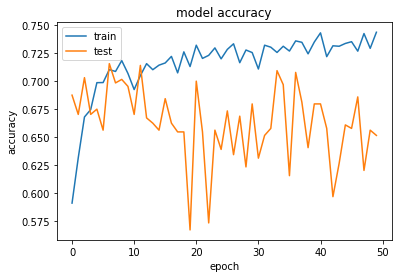

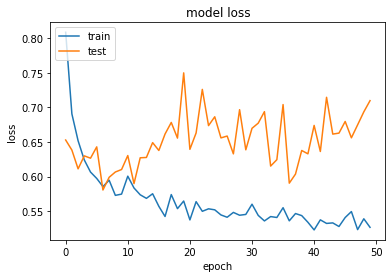

In [ ]:
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/Project2020/working/results/17_3_21_VGG16_epoch50_model_acc_vs_epoch.jpg')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/Project2020/working/results/17_3_21_VGG16_epoch50_model_loss_vs_epoch.jpg')
plt.show()